<a href="https://colab.research.google.com/github/aizatbite/CDS503-Decision-Tree/blob/main/Decision_Tree_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare Data


In [ ]:
#Import pandas into library
import pandas as pd

In [ ]:
#Uploading csv file from local drive
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [ ]:
#Read csv data file
#Data without feature standardization
df = pd.read_csv('titanic.csv')

In [ ]:
#view the number of rows and columns
df.shape

(887, 8)

In [ ]:
df.tail()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.00
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.00
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.45
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.00
886,0,3,Mr. Patrick Dooley,male,32.0,0,0,7.75


In [ ]:
#Rename
df.columns= ['survived','pclass','name','sex','age','sibspouse','parchild','fare']
df.columns 

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibspouse', 'parchild',
       'fare'],
      dtype='object')

In [ ]:
df = df.drop('name', axis=1)
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibspouse', 'parchild', 'fare'], dtype='object')

In [ ]:
#What does the data treated as
df.dtypes

survived       int64
pclass         int64
sex           object
age          float64
sibspouse      int64
parchild       int64
fare         float64
dtype: object

In [ ]:
#Convert interger to string : Survived
df['survived'] = df['survived'].astype(str)

#Convert integer to string : Pclass
df['pclass'] = df['pclass'].astype(str)

#Convert integer to string : sex
df['sex'] = df['sex'].astype(str)

df.dtypes

survived      object
pclass        object
sex           object
age          float64
sibspouse      int64
parchild       int64
fare         float64
dtype: object

In [ ]:
#Import LabelEncoder
from sklearn import preprocessing

#Create LabelEncoder
le = preprocessing.LabelEncoder()

#Convert string categories into numbers for sex
df['sex'] = le.fit_transform(df['sex'])

df

,survived,pclass,sex,age,sibspouse,parchild,fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,1,27.0,0,0,13.0000
883,1,1,0,19.0,0,0,30.0000
884,0,3,0,7.0,1,2,23.4500
885,1,1,1,26.0,0,0,30.0000


# Train and Validate Decision Tree Classifier

First, we will have to indicate the target (class label) to be predicted as well as the columns that will serve as
features.

In [ ]:
#Indicate the target column
target = df['survived']

#Indicate the columns that will serve as features
features = df.drop('survived', axis = 1)

We will then split the dataset into 3 parts: training set, development set and test set.

In [ ]:
#Split the data into train, validation and test sets

#Import train_test_split function
from sklearn.model_selection import train_test_split

#Split the dataset into traning + dvelopment set & test set
x, x_test, y, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

#Split the dataset into training set and development set
x_train, x_dev, y_train, y_dev = train_test_split(x, y, test_size=0.2, random_state=10)

In [ ]:
#Training a decision tree model

#Import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

#Create a decision tree classifier with default parameters
dtree = DecisionTreeClassifier(random_state = 0)

#Train the model using the training set
dtree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
#Predict the target for the development dataset
dev_predict = dtree.predict(x_dev)

dev_predict

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1])

In [ ]:
#Evaluate the decision tree model on development set
#Import scikit learn metrics module for accuracy calculation
from sklearn import metrics

#Compute the model accuracy on the development set :How ofthe the classifier correct?
print ("Accuracy : ", metrics.accuracy_score(y_dev, dev_predict))

Accuracy :  0.8380281690140845


Accuracy of the decision tree classifier is 84%.

For classification task, we can also view the confusion matrix and other performance metrics: precision, recall
and F1 score

In [ ]:
#Import scikit learn metrics method
from sklearn.metrics import classification_report, confusion_matrix

#print confusion matrix
print(confusion_matrix(y_dev, dev_predict))

#print precision, recall and F1
print(classification_report(y_dev, dev_predict))

[[74 11]
 [12 45]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87        85
           1       0.80      0.79      0.80        57

    accuracy                           0.84       142
   macro avg       0.83      0.83      0.83       142
weighted avg       0.84      0.84      0.84       142



From the confusion matrix, we can observe that out of 142 instances in the development set, our decision tree
algorithm misclassified 23. From the F1, we can also see that the classifier is slightly better at predicting the
passengers who did not survive (F1 = 0.87) compared to those who survived (F1 = 0.80). However, overall
weighted F1 is fairly high (F1 = 0.84).


# Tune Parameters

In [ ]:
#create a decision tree classifier with criterion = entropy & max depth = 3
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3)

#trsin the model using training set
dtree.fit(x_train, y_train)

#predict the target for the development dataset
dev_predict = dtree.predict(x_dev)

#compute the model accuracy on the development set : How often is the classifier always correct?
print("Accuracy : ", metrics.accuracy_score(y_dev, dev_predict))


Accuracy :  0.8169014084507042


Accuracy decreased slightly to 82%. We can continue to tune the parameters until we find the best performing
model.


# Visualize Decision Tree

In [ ]:
# Load required libraries
import sklearn.tree as tree
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


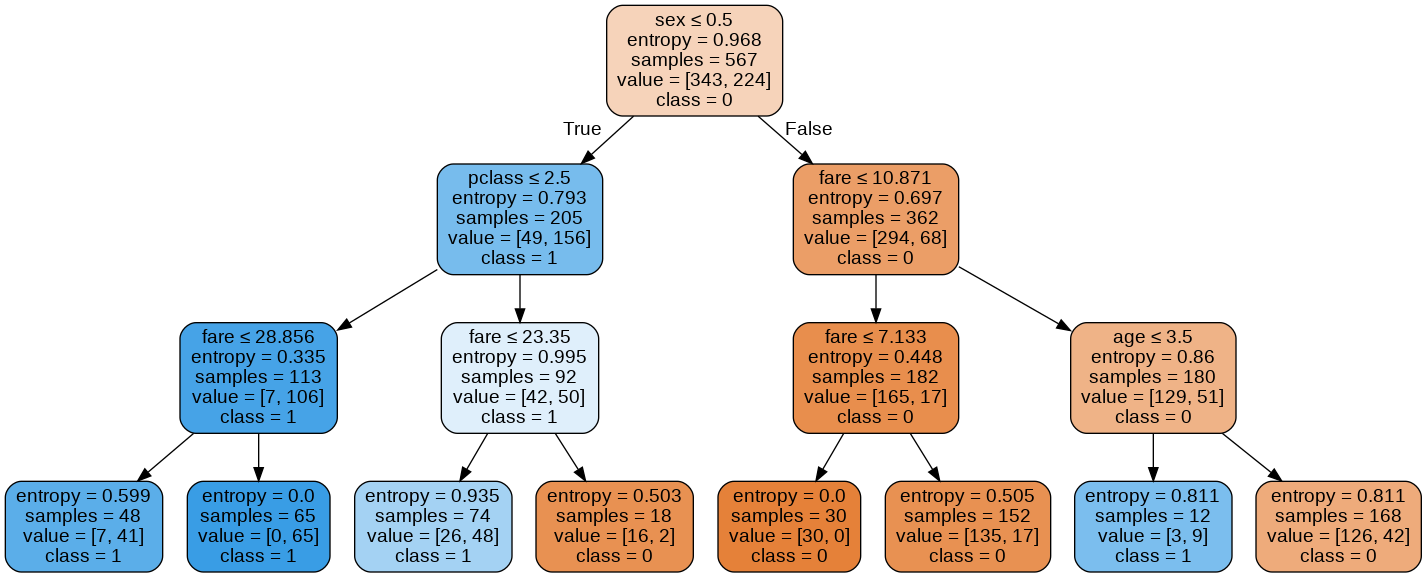

In [ ]:
# Visualize decision tree
dot_data = StringIO()
tree.export_graphviz(dtree, 
 out_file = dot_data, 
 class_names = ['0', '1'], # name of each of the target classes in asce
 feature_names = features.columns, # the feature names.
 filled = True, # whether to fill in the boxes with colors.
 rounded = True, # whether to round the corners of the boxes.
 special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

The decision tree above will be printed. Right-click the mouse and select "Save image as..." to save the
decision tree image.


Other than the graphical decision tree shown above, you can also choose to generate a set of rules.


In [ ]:
# Load export_text library
from sklearn.tree.export import export_text
tree_rules = export_text(dtree, feature_names=list(x_train))
# Print deccision tree rules
print(tree_rules)

|--- sex <= 0.50
|   |--- pclass <= 2.50
|   |   |--- fare <= 28.86
|   |   |   |--- class: 1
|   |   |--- fare >  28.86
|   |   |   |--- class: 1
|   |--- pclass >  2.50
|   |   |--- fare <= 23.35
|   |   |   |--- class: 1
|   |   |--- fare >  23.35
|   |   |   |--- class: 0
|--- sex >  0.50
|   |--- fare <= 10.87
|   |   |--- fare <= 7.13
|   |   |   |--- class: 0
|   |   |--- fare >  7.13
|   |   |   |--- class: 0
|   |--- fare >  10.87
|   |   |--- age <= 3.50
|   |   |   |--- class: 1
|   |   |--- age >  3.50
|   |   |   |--- class: 0



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


sex - 0: Female, 1: Male

pclass - 1: Upper, 2: Middle, 3: Lower


Here are some examples how we can interpret the rules: Female passengers (sex <= 0.50) from lower class
(pclass > 2.5) who paid more than 23.35 fare did not survive. Male passengers (sex > 0.5) who paid more than
10.87 fare and are aged less than or equals to 3.5 years old survived.